<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>TRABAJO FIN DE MÁSTER</header1></center>

## Importación de librerias necesarias

In [3]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [4]:
df = pd.read_csv("indice_vulnerabilidad_detalle.csv")

df.head()

,COD_MUNICIPIO,MUNICIPIO,POBLACION_TOTAL,PROP_ENVEJECIMIENTO,EMPRESAS,SERVICIOS_SANIDAD,ESCUELAS,DISTANCIA_CAPITAL,POBLACION_2030_PROY,VAR_2024_2030,...,SERVICIOS_SANIDAD_PCT,ESCUELAS_PCT,DISTANCIA_CAPITAL_PCT,DIM_DEMOGRAFICA,DIM_ECONOMICA,DIM_SERVICIOS,DIM_ACCESIBILIDAD,DIM_DINAMICA_FUTURA,INDICE_VULNERABILIDAD,NIVEL_VULNERABILIDAD
0,42001,42001 ABEJAR,386,0.248042,23.0,1.0,0.0,27.4,291,-95,...,0.678571,0.554945,0.178571,0.115385,0.109890,0.616758,0.178571,0.087912,0.221703,Baja
1,42003,42003 ADRADAS,58,0.328125,8.0,2.0,0.0,54.3,74,16,...,0.329670,0.554945,0.615385,0.326923,0.282967,0.442308,0.615385,0.686813,0.470879,Media
2,42004,42004 AGREDA,3094,0.256726,186.0,2.0,3.0,57.1,3179,85,...,0.329670,0.038462,0.686813,0.131868,0.021978,0.184066,0.686813,0.384615,0.281868,Baja
3,42006,42006 ALCONABA,199,0.298507,11.0,4.0,0.0,13.0,407,208,...,0.118132,0.554945,0.027473,0.214286,0.197802,0.336538,0.027473,0.934066,0.342033,Baja
4,42007,42007 ALCUBILLA DE AVELLANEDA,107,0.518868,5.0,4.0,0.0,78.9,160,53,...,0.118132,0.554945,0.936813,0.862637,0.362637,0.336538,0.936813,0.818681,0.663462,Alta


In [5]:
#Se seleccionan las dimensiones del índice como variables de entrada para el clustering,
#evitando el uso del índice agregado.
vars_cluster = [
    "DIM_DEMOGRAFICA",
    "DIM_ECONOMICA",
    "DIM_SERVICIOS",
    "DIM_ACCESIBILIDAD",
    "DIM_DINAMICA_FUTURA"
]

X = df[vars_cluster]

In [6]:
#estandarizamos variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
#numero de clusters
sil_scores = {}

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil_scores[k] = silhouette_score(X_scaled, labels)

sil_scores

C:\Users\elena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\elena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\elena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\elena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

{2: 0.27257163242325033,
 3: 0.2359377422491007,
 4: 0.20629644241083672,
 5: 0.2280832099365171}

Se aplica el algoritmo K-means para identificar grupos homogéneos de municipios a partir de las dimensiones definidas. Se decide poner 3 clusters

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["CLUSTER"] = kmeans.fit_predict(X_scaled)

C:\Users\elena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
df.groupby("CLUSTER")[vars_cluster].mean()

,DIM_DEMOGRAFICA,DIM_ECONOMICA,DIM_SERVICIOS,DIM_ACCESIBILIDAD,DIM_DINAMICA_FUTURA
CLUSTER,,,,,
0,0.405678,0.180861,0.298268,0.744124,0.471764
1,0.650791,0.685299,0.584955,0.561505,0.586707
2,0.273294,0.350618,0.467434,0.201751,0.354567


In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

df_plot = df.copy()
df_plot["PCA_1"] = X_pca[:, 0]
df_plot["PCA_2"] = X_pca[:, 1]

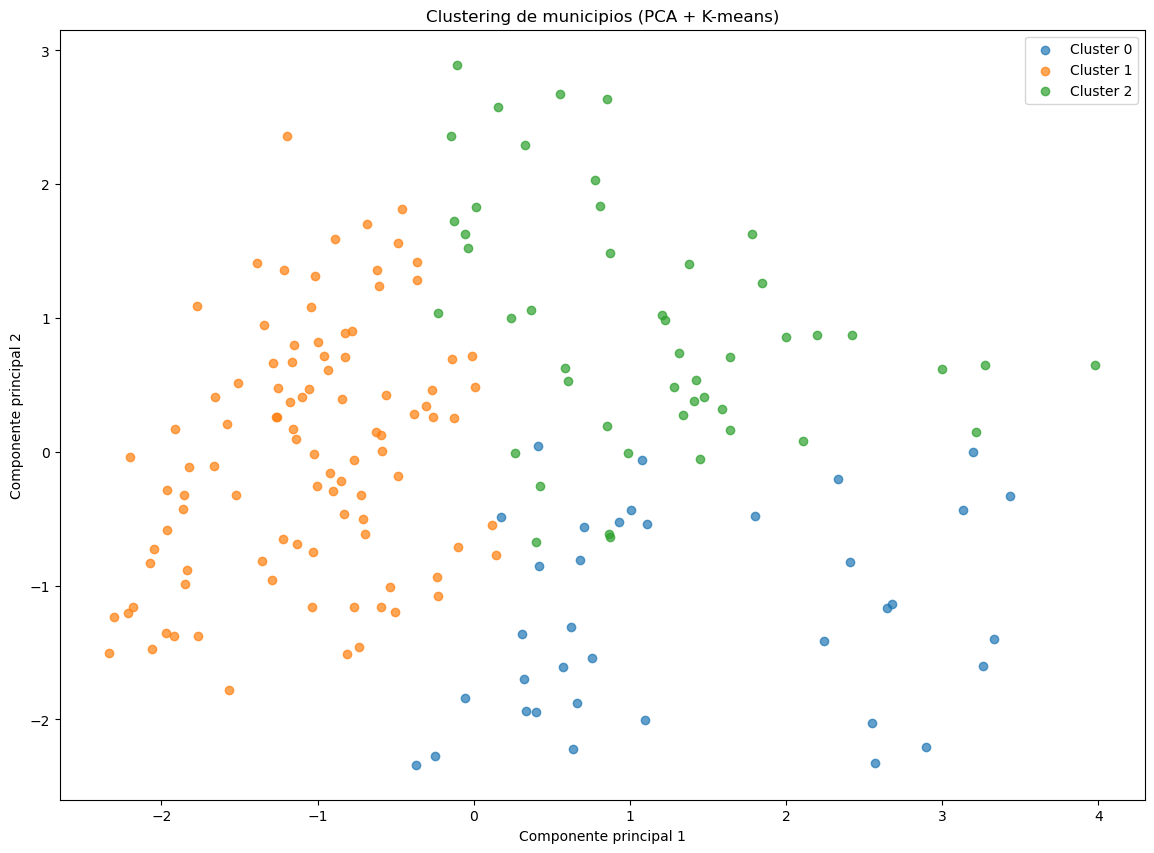

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

for cluster in sorted(df_plot["CLUSTER"].unique()):
    subset = df_plot[df_plot["CLUSTER"] == cluster]
    plt.scatter(
        subset["PCA_1"],
        subset["PCA_2"],
        label=f"Cluster {cluster}",
        alpha=0.7
    )

plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.title("Clustering de municipios (PCA + K-means)")
plt.legend()
plt.show()

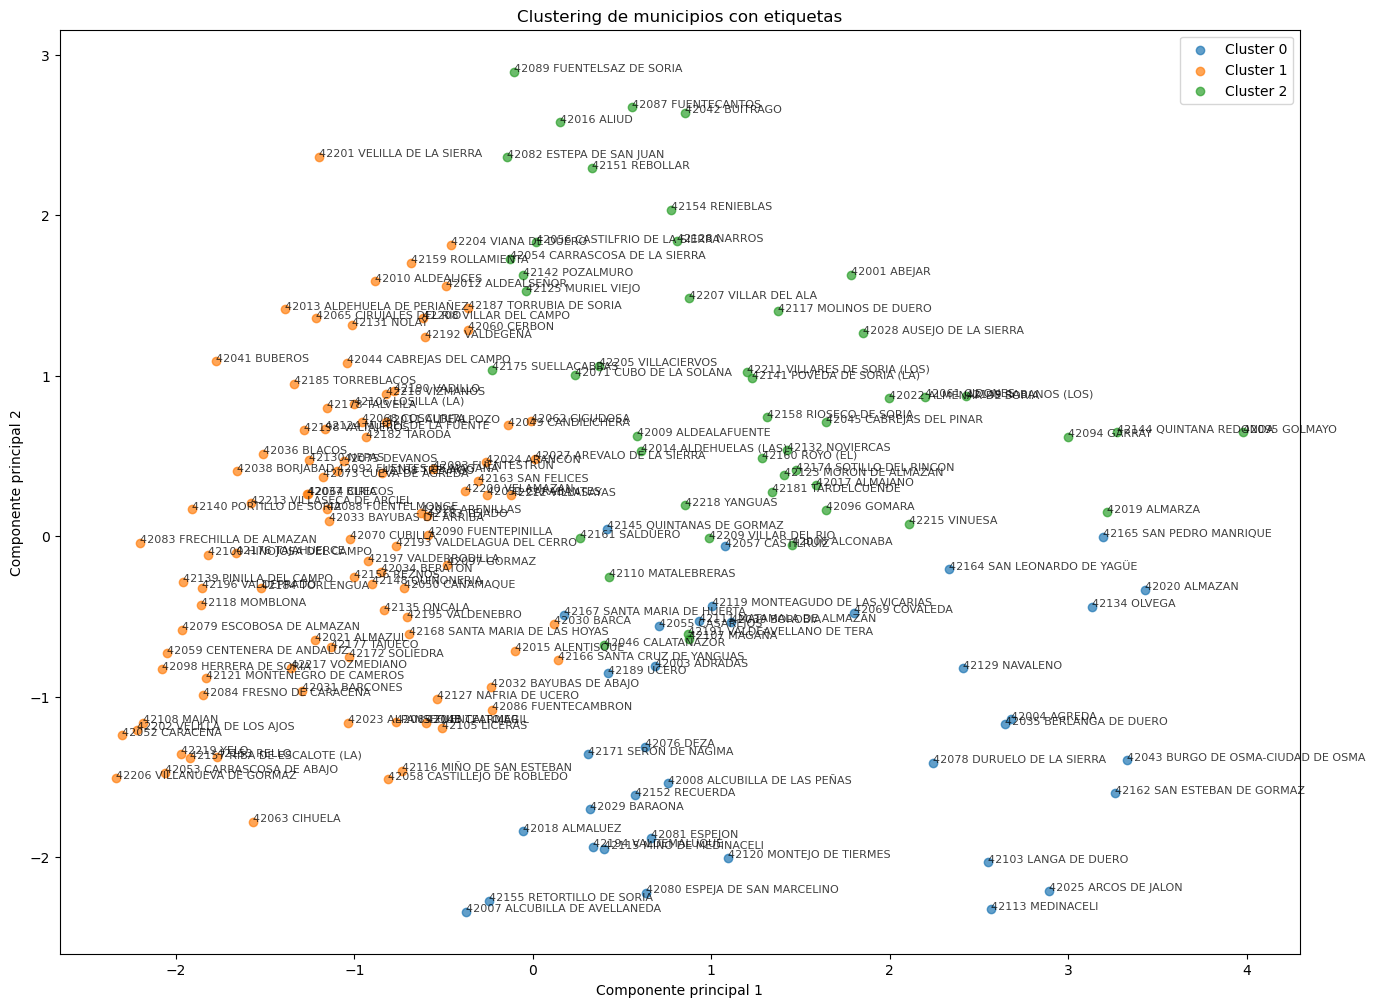

In [13]:
plt.figure(figsize=(16, 12))

for cluster in sorted(df_plot["CLUSTER"].unique()):
    subset = df_plot[df_plot["CLUSTER"] == cluster]
    plt.scatter(
        subset["PCA_1"],
        subset["PCA_2"],
        label=f"Cluster {cluster}",
        alpha=0.7
    )
    
    for _, row in subset.iterrows():
        plt.text(
            row["PCA_1"],
            row["PCA_2"],
            row["MUNICIPIO"],
            fontsize=8,
            alpha=0.75
        )

plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.title("Clustering de municipios con etiquetas")
plt.legend()
plt.show()

In [15]:
df_plot.to_csv(
    "municipios_pca_clusters.csv",
    index=False,
    encoding="utf-8"
)

In [51]:
#municipios en cada cluster

clusters = sorted(df_plot["CLUSTER"].unique())

for cluster in clusters:
    print(f"\nCluster {cluster}")
    display(
        df_plot[df_plot["CLUSTER"] == cluster][
            ["COD_MUNICIPIO", "MUNICIPIO", "NIVEL_VULNERABILIDAD"]
        ].sort_values("MUNICIPIO")
    )


Cluster 0


,COD_MUNICIPIO,MUNICIPIO,NIVEL_VULNERABILIDAD
1,42003,42003 ADRADAS,Media
2,42004,42004 AGREDA,Baja
4,42007,42007 ALCUBILLA DE AVELLANEDA,Alta
5,42008,42008 ALCUBILLA DE LAS PEÑAS,Media
15,42018,42018 ALMALUEZ,Alta
17,42020,42020 ALMAZAN,Baja
22,42025,42025 ARCOS DE JALON,Baja
26,42029,42029 BARAONA,Media
32,42035,42035 BERLANGA DE DUERO,Baja
36,42039,42039 BOROBIA,Baja



Cluster 1


,COD_MUNICIPIO,MUNICIPIO,NIVEL_VULNERABILIDAD
7,42010,42010 ALDEALICES,Media
8,42011,42011 ALDEALPOZO,Media
9,42012,42012 ALDEALSEÑOR,Media
10,42013,42013 ALDEHUELA DE PERIAÑEZ,Media
12,42015,42015 ALENTISQUE,Media
...,...,...,...
175,42212,42212 VILLASAYAS,Media
176,42213,42213 VILLASECA DE ARCIEL,Alta
178,42216,42216 VIZMANOS,Media
179,42217,42217 VOZMEDIANO,Alta



Cluster 2


,COD_MUNICIPIO,MUNICIPIO,NIVEL_VULNERABILIDAD
0,42001,42001 ABEJAR,Baja
3,42006,42006 ALCONABA,Baja
6,42009,42009 ALDEALAFUENTE,Baja
11,42014,42014 ALDEHUELAS (LAS),Baja
13,42016,42016 ALIUD,Baja
14,42017,42017 ALMAJANO,Baja
16,42019,42019 ALMARZA,Baja
19,42022,42022 ALMENAR DE SORIA,Baja
25,42028,42028 AUSEJO DE LA SIERRA,Baja
38,42042,42042 BUITRAGO,Baja


In [53]:
#guardamos el resultado en un fichero para la visualizacion

df_cluster_vuln = df_plot[
    [
        "COD_MUNICIPIO",
        "MUNICIPIO",
        "CLUSTER",
        "NIVEL_VULNERABILIDAD",
        "INDICE_VULNERABILIDAD"
    ]
].copy()

df_cluster_vuln.head()

,COD_MUNICIPIO,MUNICIPIO,CLUSTER,NIVEL_VULNERABILIDAD,INDICE_VULNERABILIDAD
0,42001,42001 ABEJAR,2,Baja,0.221703
1,42003,42003 ADRADAS,0,Media,0.470879
2,42004,42004 AGREDA,0,Baja,0.281868
3,42006,42006 ALCONABA,2,Baja,0.342033
4,42007,42007 ALCUBILLA DE AVELLANEDA,0,Alta,0.663462


In [55]:
df_cluster_vuln["CLUSTER"].value_counts()
df_cluster_vuln["NIVEL_VULNERABILIDAD"].value_counts()

NIVEL_VULNERABILIDAD
Baja     61
Alta     61
Media    60
Name: count, dtype: int64

In [57]:
df_cluster_vuln.to_csv(
    "clusters.csv",
    index=False
)

In [59]:
#describimos el perfil de cada cluster

vars_perfil = [
    "POBLACION_TOTAL",
    "PROP_ENVEJECIMIENTO",
    "EMPRESAS",
    "SERVICIOS_SANIDAD",
    "ESCUELAS",
    "DISTANCIA_CAPITAL"
]

perfil_clusters = (
    df_plot
    .groupby("CLUSTER")[vars_perfil]
    .mean()
    .round(2)
)

perfil_clusters

,POBLACION_TOTAL,PROP_ENVEJECIMIENTO,EMPRESAS,SERVICIOS_SANIDAD,ESCUELAS,DISTANCIA_CAPITAL
CLUSTER,,,,,,
0,922.67,0.35,56.72,4.31,1.28,64.64
1,43.76,0.45,0.45,1.26,0.00,52.39
2,247.83,0.29,15.65,2.29,0.23,27.94


In [61]:
perfil_clusters["N_MUNICIPIOS"] = df_plot["CLUSTER"].value_counts().sort_index()
perfil_clusters

,POBLACION_TOTAL,PROP_ENVEJECIMIENTO,EMPRESAS,SERVICIOS_SANIDAD,ESCUELAS,DISTANCIA_CAPITAL,N_MUNICIPIOS
CLUSTER,,,,,,,
0,922.67,0.35,56.72,4.31,1.28,64.64,36
1,43.76,0.45,0.45,1.26,0.00,52.39,98
2,247.83,0.29,15.65,2.29,0.23,27.94,48


In [63]:
perfil_clusters.to_csv(
    "clusters_detalle.csv",
    index=False
)